In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#1.1. Перегляньте перші кілька рядків.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
#1.2. Перевірте назви стовпців та типи даних.
print("Назви стовпців:\n", df.columns)
print("\nТипи даних:\n", df.dtypes)

Назви стовпців:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Типи даних:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmet

In [3]:
#1.3. Перевірте наявність пропущених значень.
print("\nКількість пропущених значень у кожному стовпці:\n", df.isnull().sum())


Кількість пропущених значень у кожному стовпці:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
#1.4. Досліджуйте розмір даних.
df.shape

(569, 31)

In [5]:
#2.1. Розділіть дані на навчальний і тестовий набори.
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Тренувальна вибірка: {X_train.shape[0]}')
print(f'Тестова вибірка: {X_test.shape[0]}')

Тренувальна вибірка: 455
Тестова вибірка: 114


In [6]:
#2.2. Побудуйте три моделі класифікації (на власний вибір),
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Створюємо три моделі
log_reg = LogisticRegression(max_iter=10000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Навчаємо моделі
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Робимо передбачення на тестових даних
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Оцінюємо точність кожної моделі
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_decision_tree))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_random_forest))


Accuracy Logistic Regression: 0.956140350877193
Accuracy Decision Tree: 0.9473684210526315
Accuracy Random Forest: 0.9649122807017544


In [7]:
#2.3. Підберіть оптимальні параметри для кожної моделі за допомогою GridSearchCV (можна вибрати інший оптимізатор).
from sklearn.model_selection import GridSearchCV

# Визначаємо сітки параметрів
param_grids = {
    'log_reg': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'decision_tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# GridSearch для логістичної регресії
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42),
                            param_grids['log_reg'], cv=5, n_jobs=-1, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# GridSearch для дерева рішень
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                  param_grids['decision_tree'], cv=5, n_jobs=-1, scoring='accuracy')
grid_decision_tree.fit(X_train, y_train)

# GridSearch для випадкового лісу
grid_random_forest = GridSearchCV(RandomForestClassifier(random_state=42),
                                  param_grids['random_forest'], cv=5, n_jobs=-1, scoring='accuracy')
grid_random_forest.fit(X_train, y_train)

# Найкращі параметри
print("Best params for Logistic Regression:", grid_log_reg.best_params_)
print("Best params for Decision Tree:", grid_decision_tree.best_params_)
print("Best params for Random Forest:", grid_random_forest.best_params_)

# Оцінка моделей з найкращими параметрами
best_log_reg = grid_log_reg.best_estimator_
best_decision_tree = grid_decision_tree.best_estimator_
best_random_forest = grid_random_forest.best_estimator_

y_pred_best_log_reg = best_log_reg.predict(X_test)
y_pred_best_decision_tree = best_decision_tree.predict(X_test)
y_pred_best_random_forest = best_random_forest.predict(X_test)

print("Best Logistic Regression accuracy:", accuracy_score(y_test, y_pred_best_log_reg))
print("Best Decision Tree accuracy:", accuracy_score(y_test, y_pred_best_decision_tree))
print("Best Random Forest accuracy:", accuracy_score(y_test, y_pred_best_random_forest))


Best params for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best params for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Logistic Regression accuracy: 0.956140350877193
Best Decision Tree accuracy: 0.956140350877193
Best Random Forest accuracy: 0.9649122807017544


In [8]:
#3.Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю помилок (confusion matrix) – за вибором та звіт про класифікацію (classification report) для кожної моделі.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Функція для оцінки моделі
def evaluate_model(model_name, y_test, y_pred):
    print(f"\nОцінка для моделі: {model_name}")

    # Точність
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точність (Accuracy): {accuracy}")

    # Матриця помилок (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred)
    print("Матриця помилок (Confusion Matrix):")
    print(cm)

    # Звіт про класифікацію (Classification Report)
    cr = classification_report(y_test, y_pred)
    print("Звіт про класифікацію (Classification Report):")
    print(cr)

# Оцінка для початкових моделей
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("Decision Tree", y_test, y_pred_decision_tree)
evaluate_model("Random Forest", y_test, y_pred_random_forest)

# Оцінка для моделей з найкращими параметрами
evaluate_model("Best Logistic Regression", y_test, y_pred_best_log_reg)
evaluate_model("Best Decision Tree", y_test, y_pred_best_decision_tree)
evaluate_model("Best Random Forest", y_test, y_pred_best_random_forest)



Оцінка для моделі: Logistic Regression
Точність (Accuracy): 0.956140350877193
Матриця помилок (Confusion Matrix):
[[39  4]
 [ 1 70]]
Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Оцінка для моделі: Decision Tree
Точність (Accuracy): 0.9473684210526315
Матриця помилок (Confusion Matrix):
[[40  3]
 [ 3 68]]
Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95 


Найкраща модель: Random Forest з точністю: 0.9649122807017544

Результати прогнозування:
     Actual  Predicted
204       1          1
70        0          0
131       0          0
431       1          1
540       1          1
567       0          0
369       0          0
29        0          0
81        1          0
477       1          1

Матриця помилок:
[[40  3]
 [ 1 70]]

Звіт про класифікацію:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



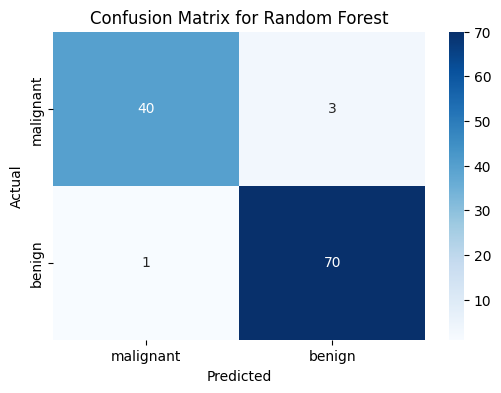

In [18]:
#4. Прогнозування і висновки
#4.1. Оберіть найкращу модель на основі метрик продуктивності.
#4.2. Зробіть прогноз на тестовій вибірці.
#4.3. Виведіть результати прогнозування.

# Визначаємо найкращу модель на основі точності
best_model_name = None
best_accuracy = 0

models = {
    "Logistic Regression": (log_reg, y_pred_log_reg),
    "Decision Tree": (decision_tree, y_pred_decision_tree),
    "Random Forest": (random_forest, y_pred_random_forest),
    "Best Logistic Regression": (best_log_reg, y_pred_best_log_reg),
    "Best Decision Tree": (best_decision_tree, y_pred_best_decision_tree),
    "Best Random Forest": (best_random_forest, y_pred_best_random_forest)
}

for model_name, (model, y_pred) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nНайкраща модель: {best_model_name} з точністю: {best_accuracy}")

## Прогнозуємо на тестовій вибірці за допомогою найкращої моделі
best_model = models[best_model_name][0]
final_predictions = best_model.predict(X_test)

# Виводимо результати прогнозування
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})
print("\nРезультати прогнозування:")
print(results_df.head(10))  # Виводимо перші 10 прогнозів

cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best, target_names=data.target_names)

print("\nМатриця помилок:")
print(cm)

print("\nЗвіт про класифікацію:")
print(report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
#Завдання 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#
file_path='/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,Kelly,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,Wilkes,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,Myles,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,Wirz,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#
df.shape

(418, 12)

In [24]:
#
print("\nТипи даних:\n", df.dtypes)


Типи даних:
 PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [25]:
#
print("Пропущені значення в кожному стовпці:\n", df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))

Пропущені значення в кожному стовпці:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [26]:
#
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
#
print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [28]:
#df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,Kelly,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,Wilkes,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,Myles,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,Wirz,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
#
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)
df.dtypes

<ipython-input-29-fde67b3c1023>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)


,0
PassengerId,int64
Survived,int64
Pclass,object
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [36]:
#
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 334
Розмір тестової вибірки: 84
